<a href="https://colab.research.google.com/github/David-Kumawat/Credit-Card-Default-Prediction-Classification/blob/main/Credit_Card_Default_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Detection



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Problem Statement**


The aim is to develop a system or model that can accurately identify and prevent fraudulent transactions on credit cards. The primary objective is to protect both the bank and its customers from financial losses and potential security breaches. Credit card fraud can lead to significant financial damages, loss of customer trust, and damage to the bank's reputation. Therefore, it is crucial to employ effective fraud detection mechanisms to detect and prevent fraudulent activities.



# ***Let's Begin !***


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

defaulter = pd.read_excel('/content/drive/MyDrive/Supervised Learning/Classification/default of credit card clients.xls')

### Dataset First View

In [3]:
# Dataset First View
pd.set_option('display.max_columns',None)
defaulter.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9    X10    X11        X12        X13        X14        X15        X16  \
0  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5   
1     -1     -2     -2       3913       3102        689          0          0   
2      0      0      2       2682       1725       2682       3272       3455   
3      0      0      0      29239      14027      13559      14331      14948   
4      0      0      0      46990      48233      49291      28314      28959   

         X17       X18       X19       X20       X21       X22       X23  \
0  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   
1          0         0       689         0         0         0         0   
2       3261         0      1000      1000      1000         0      2000   
3      15549      1518      1500      1000      1000      1000      5000   
4      29547      2000      2019      1200      1100      1069      1000   

                            Y  
0  default payment next month  
1                           1  
2                           1  
3                           0  
4                           0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

defaulter.shape

(30001, 25)

### Dataset Information

In [5]:
# Dataset Info

defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [6]:
from pandas.core.base import duplicated
# Dataset Duplicate Values Count

len(defaulter[defaulter.duplicated()])

0



#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print(defaulter.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


<Axes: >

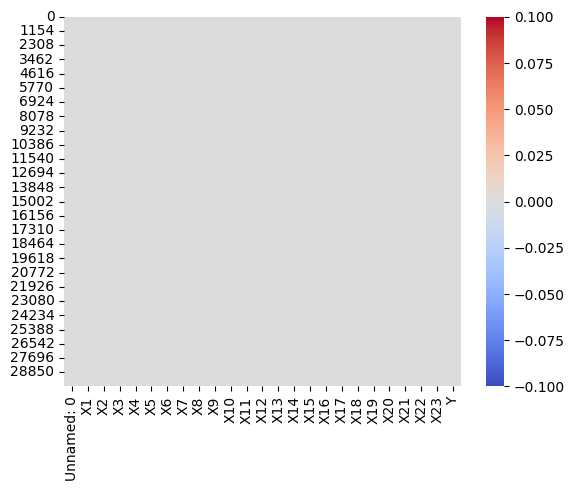

In [8]:
# Visualizing the missing values

sns.heatmap(defaulter.isnull(),cmap='coolwarm')

### What did you know about your dataset?

**Answer:** The dataset given is from the bank industry, and we have to analyse the default of our clients. In Dataset, I have 30001 Rows and 25 Columns and All 25 Columns are Object Data types. The Dataset does not have duplicated values and also does not have null values in it.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

defaulter.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [10]:
# Setting to maximum display all columns
pd.set_option('display.max_columns', None)
# Setting 1st row names as columns name
defaulter.columns = defaulter.iloc[0]
defaulter.drop(defaulter.index[0],inplace=True)
# Resetting index
defaulter.reset_index(inplace=True, drop=True)
defaulter.head()

0 ID LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6  \
0  1     20000   2         2        1  24     2     2    -1    -1    -2    -2   
1  2    120000   2         2        2  26    -1     2     0     0     0     2   
2  3     90000   2         2        2  34     0     0     0     0     0     0   
3  4     50000   2         2        1  37     0     0     0     0     0     0   
4  5     50000   1         2        1  57    -1     0    -1     0     0     0   

0 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1  \
0      3913      3102       689         0         0         0        0   
1      2682      1725      2682      3272      3455      3261        0   
2     29239     14027     13559     14331     14948     15549     1518   
3     46990     48233     49291     28314     28959     29547     2000   
4      8617      5670     35835     20940     19146     19131     2000   

0 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6 default payment next month  
0      689        0        0        0        0                          1  
1     1000     1000     1000        0     2000                          1  
2     1500     1000     1000     1000     5000                          0  
3     2019     1200     1100     1069     1000                          0  
4    36681    10000     9000      689      679                          0

In [11]:
# Recheck Columns

defaulter.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [12]:
# Dataset Describe

defaulter.describe()

0          ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
count   30000      30000  30000      30000     30000  30000  30000  30000   
unique  30000         81      2          7         4     56     11     11   
top         1      50000      2          2         2     29      0      0   
freq        1       3365  18112      14030     15964   1605  14737  15730   

0       PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
count   30000  30000  30000  30000      30000      30000      30000   
unique     11     11     10     10      22723      22346      22026   
top         0      0      0      0          0          0          0   
freq    15764  16455  16947  16286       2008       2506       2870   

0       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
count       30000      30000      30000     30000     30000     30000   
unique      21548      21010      20604      7943      7899      7518   
top             0          0          0         0         0         0   
freq         3195       3506       4020      5249      5396      5968   

0       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
count      30000     30000     30000                       30000  
unique      6937      6897      6939                           2  
top            0         0         0                           0  
freq        6408      6703      7173                       23364

### Variables Description

###There are 25 variables:

####ID: ID of each client
####LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
####SEX: Gender (1=male, 2=female)
####EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
####MARRIAGE: Marital status (1=married, 2=single, 3=others)
####AGE: Age in years
####PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
####PAY_2: Repayment status in August, 2005 (scale same as above)
####PAY_3: Repayment status in July, 2005 (scale same as above)
####PAY_4: Repayment status in June, 2005 (scale same as above)
####PAY_5: Repayment status in May, 2005 (scale same as above)
####PAY_6: Repayment status in April, 2005 (scale same as above)
####BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
####BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
####BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
####BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
####BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
####BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
####PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
####PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
####PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
####PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
####PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
####PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
####default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in defaulter.columns.tolist():
  print("No. of unique values in ",i,"is",defaulter[i].nunique(),".")

No. of unique values in  ID is 30000 .
No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Making of the dataset

df = defaulter.copy()

In [15]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [16]:
# making dataset more readable by renaming columns
rename_list = ['cust_id','max_credit_limit', 'gender', 'education', 'marital_status', 'age',
               'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april',
               'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
               'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april',
               'default_nxt_mnth']
col_rename = dict(zip(df.columns,rename_list))
df = df.rename(columns=col_rename)

In [17]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_id           30000 non-null  object
 1   max_credit_limit  30000 non-null  object
 2   gender            30000 non-null  object
 3   education         30000 non-null  object
 4   marital_status    30000 non-null  object
 5   age               30000 non-null  object
 6   pay_status_sept   30000 non-null  object
 7   pay_status_aug    30000 non-null  object
 8   pay_status_july   30000 non-null  object
 9   pay_status_june   30000 non-null  object
 10  pay_status_may    30000 non-null  object
 11  pay_status_april  30000 non-null  object
 12  bill_sept         30000 non-null  object
 13  bill_aug          30000 non-null  object
 14  bill_july         30000 non-null  object
 15  bill_june         30000 non-null  object
 16  bill_may          30000 non-null  object
 17  bill_april  

#### Here we can see all columns are string type so I need to change columns string dtype to numeric.

In [18]:
import ast
# applying eval() function on all string values of all columns
for item in df.columns:
    def safe_eval(row):
        try:
            return eval(row)
        except (SyntaxError, NameError, TypeError):
            return row  # Return the original value if eval() fails

    df[item] = df[item].apply(safe_eval)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cust_id           30000 non-null  int64
 1   max_credit_limit  30000 non-null  int64
 2   gender            30000 non-null  int64
 3   education         30000 non-null  int64
 4   marital_status    30000 non-null  int64
 5   age               30000 non-null  int64
 6   pay_status_sept   30000 non-null  int64
 7   pay_status_aug    30000 non-null  int64
 8   pay_status_july   30000 non-null  int64
 9   pay_status_june   30000 non-null  int64
 10  pay_status_may    30000 non-null  int64
 11  pay_status_april  30000 non-null  int64
 12  bill_sept         30000 non-null  int64
 13  bill_aug          30000 non-null  int64
 14  bill_july         30000 non-null  int64
 15  bill_june         30000 non-null  int64
 16  bill_may          30000 non-null  int64
 17  bill_april        30000 non-nul

In [20]:
# There are total 30000 unique customers in our dataset; without any duplications
df['cust_id'].nunique()

30000

In [21]:
# Checking the count of the defaulters and no defaulters
value_counts = df['default_nxt_mnth'].value_counts()

# Display the count of values
print(value_counts)

0    23364
1     6636
Name: default_nxt_mnth, dtype: int64


In [22]:
# Count of class one
count_class_one = 6636

# Updated total count
total_count = 30000

# Calculate the percentage
percentage_class_one = (count_class_one / total_count) * 100

print("Percentage of class one:", percentage_class_one, "%")

Percentage of class one: 22.12 %


In [23]:
# Checking description of the dataset
df.describe()

0           cust_id  max_credit_limit        gender     education  \
count  30000.000000      30000.000000  30000.000000  30000.000000   
mean   15000.500000     167484.322667      1.603733      1.853133   
std     8660.398374     129747.661567      0.489129      0.790349   
min        1.000000      10000.000000      1.000000      0.000000   
25%     7500.750000      50000.000000      1.000000      1.000000   
50%    15000.500000     140000.000000      2.000000      2.000000   
75%    22500.250000     240000.000000      2.000000      2.000000   
max    30000.000000    1000000.000000      2.000000      6.000000   

0      marital_status           age  pay_status_sept  pay_status_aug  \
count    30000.000000  30000.000000     30000.000000    30000.000000   
mean         1.551867     35.485500        -0.016700       -0.133767   
std          0.521970      9.217904         1.123802        1.197186   
min          0.000000     21.000000        -2.000000       -2.000000   
25%          1.000000     28.000000        -1.000000       -1.000000   
50%          2.000000     34.000000         0.000000        0.000000   
75%          2.000000     41.000000         0.000000        0.000000   
max          3.000000     79.000000         8.000000        8.000000   

0      pay_status_july  pay_status_june  pay_status_may  pay_status_april  \
count     30000.000000     30000.000000    30000.000000      30000.000000   
mean         -0.166200        -0.220667       -0.266200         -0.291100   
std           1.196868         1.169139        1.133187          1.149988   
min          -2.000000        -2.000000       -2.000000         -2.000000   
25%          -1.000000        -1.000000       -1.000000         -1.000000   
50%           0.000000         0.000000        0.000000          0.000000   
75%           0.000000         0.000000        0.000000          0.000000   
max           8.000000         8.000000        8.000000          8.000000   

0          bill_sept       bill_aug     bill_july      bill_june  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

0           bill_may     bill_april  amt_paid_sept  amt_paid_aug  \
count   30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    40311.400967   38871.760400    5663.580500  5.921163e+03   
std     60797.155770   59554.107537   16563.280354  2.304087e+04   
min    -81334.000000 -339603.000000       0.000000  0.000000e+00   
25%      1763.000000    1256.000000    1000.000000  8.330000e+02   
50%     18104.500000   17071.000000    2100.000000  2.009000e+03   
75%     50190.500000   49198.250000    5006.000000  5.000000e+03   
max    927171.000000  961664.000000  873552.000000  1.684259e+06   

0      amt_paid_jul   amt_paid_jun   amt_paid_may  amt_paid_april  \
count   30000.00000   30000.000000   30000.000000    30000.000000   
mean     5225.68150    4826.076867    4799.387633     5215.502567   
std     17606.96147   15666.159744   15278.305679    17777.465775   
min         0.00000       0.000000       0.000000        0.000000   
25%       390.00000     296.000000     252.500000      117.750000   
50%      1800.00000    1500.000000    1500.000000     1500.000000   
75%      4505.00000    4013.250000    4031.500000     4000.000000   
max    896040.00000  621000.000000  426529.000000   528666.000000   

0      default_nxt_mnth  
count      30000.000000  
mean           0.221200  
std            0.415062  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%  

### What all manipulations have you done and insights you found?

**Answer Here:** First I Create a copy of the Dataframe named df. then I the changed Columns name for better interpretation. after this, I checked the info and found all columns are object type but all columns should in categorical or numerical for this I created a function that converts all object dtype to their original dtype.
we have 30,000 unique customers and in our dataset defaulters are very high which is 22.12%. and we have Five Numerical Features: cust_id, max_credit_limit, age, bill_x and amt_paid_x. The Rest are categorical type features.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., Default (Univariate)

In [24]:
df.head()

0  cust_id  max_credit_limit  gender  education  marital_status  age  \
0        1             20000       2          2               1   24   
1        2            120000       2          2               2   26   
2        3             90000       2          2               2   34   
3        4             50000       2          2               1   37   
4        5             50000       1          2               1   57   

0  pay_status_sept  pay_status_aug  pay_status_july  pay_status_june  \
0                2               2               -1               -1   
1               -1               2                0                0   
2                0               0                0                0   
3                0               0                0                0   
4               -1               0               -1                0   

0  pay_status_may  pay_status_april  bill_sept  bill_aug  bill_july  \
0              -2                -2       3913      3102        689   
1               0                 2       2682      1725       2682   
2               0                 0      29239     14027      13559   
3               0                 0      46990     48233      49291   
4               0                 0       8617      5670      35835   

0  bill_june  bill_may  bill_april  amt_paid_sept  amt_paid_aug  amt_paid_jul  \
0          0         0           0              0           689             0   
1       3272      3455        3261              0          1000          1000   
2      14331     14948       15549           1518          1500          1000   
3      28314     28959       29547           2000          2019          1200   
4      20940     19146       19131           2000         36681         10000   

0  amt_paid_jun  amt_paid_may  amt_paid_april  default_nxt_mnth  
0             0             0               0                 1  
1          1000             0            2000                 1  
2          1000          1000            5000                 0  
3          1100          1069            1000                 0  
4          9000           689             679                 0

0    23364
1     6636
Name: default_nxt_mnth, dtype: int64
 


<Axes: ylabel='default_nxt_mnth'>

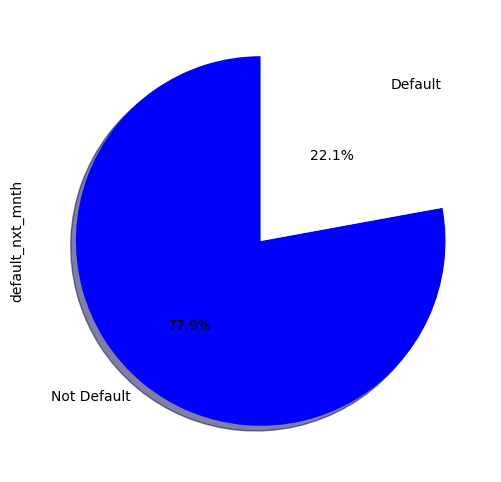

In [30]:
# Chart - 1 visualization code
# Dependant Column Value Counts

print(df.default_nxt_mnth.value_counts())
print(" ")

# Dependant Variable Column Visualization

df['default_nxt_mnth'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Default','Default'],
                               colors=['Blue','white'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**Answer Here:** A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently. So, I used a Pie chart which helped me to get the percentage comparison of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-** From the above chart I got to know that, not Defaulters which is 77.9% of the whole customer's data given in the dataset. On the other hand, 6636 customers are defaulters is 22.1%% of the whole customer data given in the dataset.

22.1% of customers are Default which does not look like a small number. So, Immediate action should be taken.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** Customer default is a loss for the company and when it goes to a high percentage bank will be closed, or the customer which is defaulted waste money of the bank and it won't give business in future. therefore banks to strict for defaulters. Default is significant in the Bank industry because it directly affects the Earnings of the Bank.

It's easy to lose money but too difficult to recover that money.



#### Chart - 2 - Pie Chart on Gender Column

2    18112
1    11888
Name: gender, dtype: int64


Text(0.5, 1.0, 'Distribution of customers basis Gender')

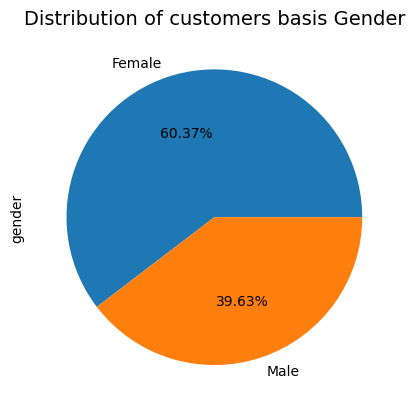

In [26]:
# Checking unique categories and their counts for Gender column
counts = df['gender'].value_counts()
print(counts)
# Pie-chart to show distribution of customers basis Gender
labels = ['Female','Male']
df['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', labels=labels)
plt.title('Distribution of customers basis Gender', fontsize = 14)


##### 1. Why did you pick the specific chart?

**Answer:-**
A pie chart is used to visually represent the composition of a whole by displaying proportions of different categories, making it easy to understand the distribution of data at a glance.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**
Here we can see the majority of class females around 60%. I think because females do more shopping that's why they have more credit cards compared to males, may be defaulter also more in females because high number of credit cards they have.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-** Yes it will impact positively because it is a study I read somewhere females spend more than males and our high number of credit cards owned by females mean the card will be used often. that's how a credit card company earns. When customers use their card.

#### Chart - 3 - Pie Chart on Education Column

In [27]:
# Checking unique categories and their counts for Education column
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [28]:
# Since we have no idea about 0, 5 and 6 categories and their counts are quite less;
# Therefore, i have decided to combine 0, 5, 6 and 4 education levels as 4 i.e., Others
df.loc[df['education']==0,'education'] = 4
df.loc[df['education']==5,'education'] = 4
df.loc[df['education']==6,'education'] = 4
df['education'].nunique()

4

Text(0, 0.5, 'Education Level')

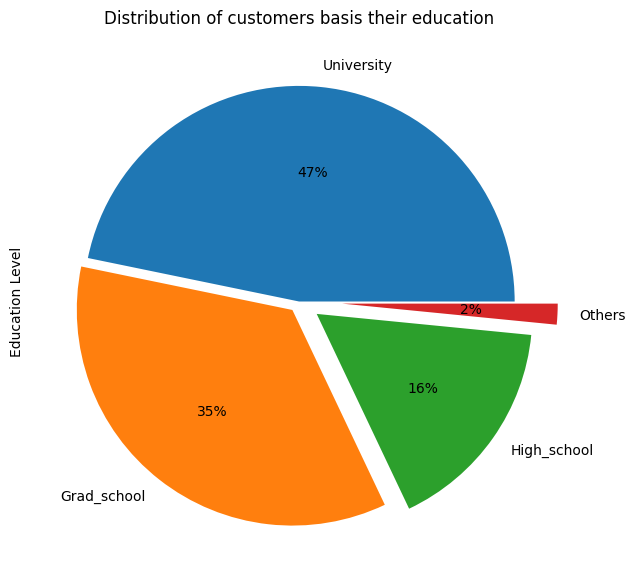

In [29]:
# Creating Pie-chart to show percentages of customers of different education categories
labels = ['University','Grad_school','High_school','Others']
explode = (0, 0.05, 0.1, 0.2)
df['education'].value_counts().plot(kind='pie', figsize=(9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis their education', fontsize = 12)
plt.ylabel('Education Level', fontsize = 10)

##### 1. Why did you pick the specific chart?

**Answer:-**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

The Majority of customers have a university-level education (~47%), followed by Graduate school-level education (around 35%). only 16% have high-school level education. That meant most of the customers were above 21 years old. they will spend more because they are young.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

Because most of the customers are educated and they are done/pursuing their masters and college they will pay their expenses on time. maybe it happens most customers are university students and they spend unnecessarily and they default. it will impact negatively and positively.

#### Chart - 4 - Distribution of Customers age

<Axes: >

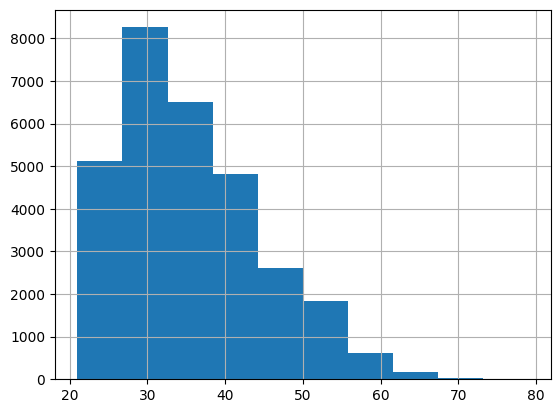

In [31]:
# Histogram to show counts of customers of different age groups
df.age.hist()

<Axes: xlabel='age', ylabel='Density'>

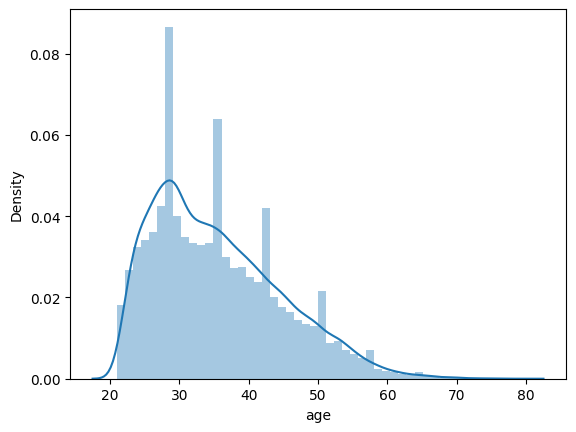

In [32]:
# density plot to show counts of customers of different ages
sns.distplot(df['age'])


<Axes: >

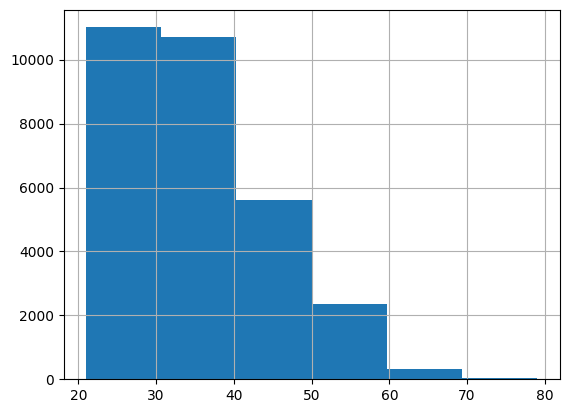

In [33]:
# Histogram to show counts of customers of 6 different age groups
df.age.hist(bins=6)


##### 1. Why did you pick the specific chart?

**Answer:-**

Histograms are used to display the distribution and frequency of numerical data, making it easy to identify patterns and understand the data's central tendencies and variations.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**  Here we can see we have all age customers 21 to 70. most of the customers are between 21 to 40 age and generally this age group spends more. and age column is rightly skewed.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

Yes, it will impact positively because most of the customers are between 21 to 40 and they spend more and as they spend as bank will earn.

#### Chart - 5 - Pie Chart with marital_status

In [34]:
# Checking unique categories and their counts for Marriage column
df['marital_status'].value_counts()


2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

Since class 0 has very little data, therefore training the model with less data will cause overfitting and lead to less generalization. That's why I'm combining zero(0) with 3.


In [35]:
# combinig 0 and 3
df.loc[df['marital_status']==0,'marital_status'] = 3
df['marital_status'].unique()

array([1, 2, 3])

Text(0, 0.5, 'Marital status')

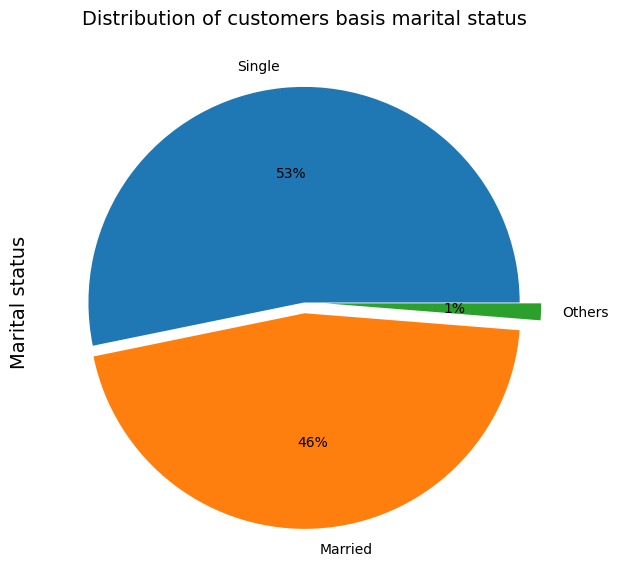

In [36]:
# Plotting pie-chart showing distribution of customers basis Marital status
labels = ['Single','Married','Others']
explode = (0, 0.05, 0.1)
df['marital_status'].value_counts().plot(kind='pie', figsize = (9,7), explode=explode, autopct='%1.0f%%', labels=labels)
plt.title('Distribution of customers basis marital status', fontsize = 14)
plt.ylabel('Marital status', fontsize = 14)


##### 1. Why did you pick the specific chart?

**Answer:-**

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through an area covered in a circle with different colours. Where different percentage comparison comes into action pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

Here we can see 53% of customers are single and 46% are married. both married and singles are somewhat are in the same count.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 6 - Pay_Status_X Columns

In [37]:
# Modular function for generating multiple histograms at once
def draw_hists(dataset, variables, n_rows, n_cols, n_bins):
  """ This function takes a dataframe and plots histograms for all its columns
  based on number of bins and subplots specified"""
  fig=plt.figure()
  for i, var_name in enumerate(variables):
    # adding subplots
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    dataset[var_name].hist(bins=n_bins,ax=ax)
    ax.set_title(var_name)
  fig.tight_layout()
  plt.show()

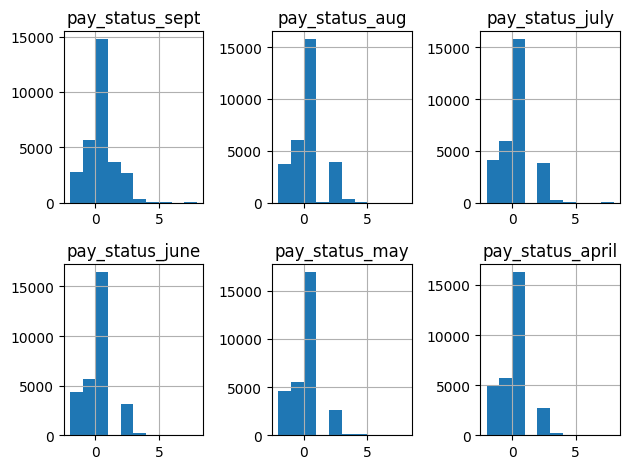

In [38]:
# checking historgrams/distributions of Status of Past Payment history of 6 months
pay_status = df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']]
draw_hists(pay_status, pay_status.columns, 2, 3, 10)

##### 1. Why did you pick the specific chart?

**Answer:-**

Histograms are used to visualize the distribution of data by dividing it into intervals (bins) and showing the frequency or count of data points within each bin, making it easy to understand the data's pattern and central tendencies.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**  

Here, we can see most of the customers due by 1 month in every month and paying in full. these two categories are the most in data. we also have those customers who are not paying for 3 to 5 months.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

Here, In every month defaulters are there it may be because customers are not paying for several months for this, we need to do something and recover our money. and do new business.

#### Chart - 7 - Education level and Default rate(Bivariate)

In [39]:
# Creating a crosstable with education and default status
education = pd.crosstab(df.education, df.default_nxt_mnth)
# Adding columns for non-default and default rates
education['Non-default_rate']=round((education[0]/(education[0]+education[1])*100),2)
education['default_rate']=round((education[1]/(education[0]+education[1])*100),2)
education

default_nxt_mnth      0     1  Non-default_rate  default_rate
education                                                    
1                  8549  2036             80.77         19.23
2                 10700  3330             76.27         23.73
3                  3680  1237             74.84         25.16
4                   435    33             92.95          7.05

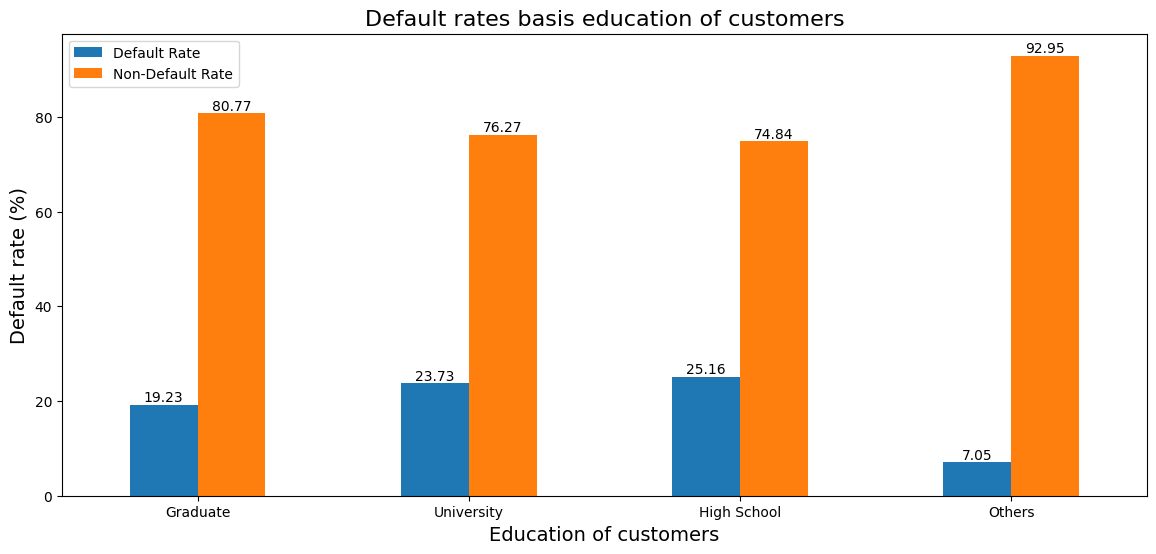

In [40]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt6 = education[['default_rate', 'Non-default_rate']].plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt6.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

ax.set_xticklabels(['Graduate', 'University', 'High School', 'Others'])
plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize=16)
plt.xlabel("Education of customers", fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.legend(["Default Rate", "Non-Default Rate"])
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

As seen earlier, majority of customers have education of University level (~47%), followed by Graduate school level (approx. 35%).

Default rate is highest for customers with high-school level education(~25%), shortly followed by customers of University level education (approx. 24%).

As education level increases (i.e., high school to university to graduate school), default rate decreases.

The least defaulters are the others.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

It will impact positively because all of the categories are defaulting and when a customer defaults bank will charge interest and fees at an exponacial level that's how a bank earns more from customers. there is a negative thing also if a customer declines to pay money (customer does not want to pay money) that time the bank has some difficulties but money will be taken from the customer.

#### Chart - 8 - Gender and Default rate

In [41]:
# Creating a crosstable with gender and respective default status
gender = pd.crosstab(df.gender, df.default_nxt_mnth)
# Getting percentages of defaulters in both genders.
gender['default_ratio'] = round((gender[1]/(gender[1]+gender[0]))*100,2)
gender['not_default_ratio'] = round((gender[0]/(gender[1]+gender[0]))*100,2)
gender

default_nxt_mnth      0     1  default_ratio  not_default_ratio
gender                                                         
1                  9015  2873          24.17              75.83
2                 14349  3763          20.78              79.22

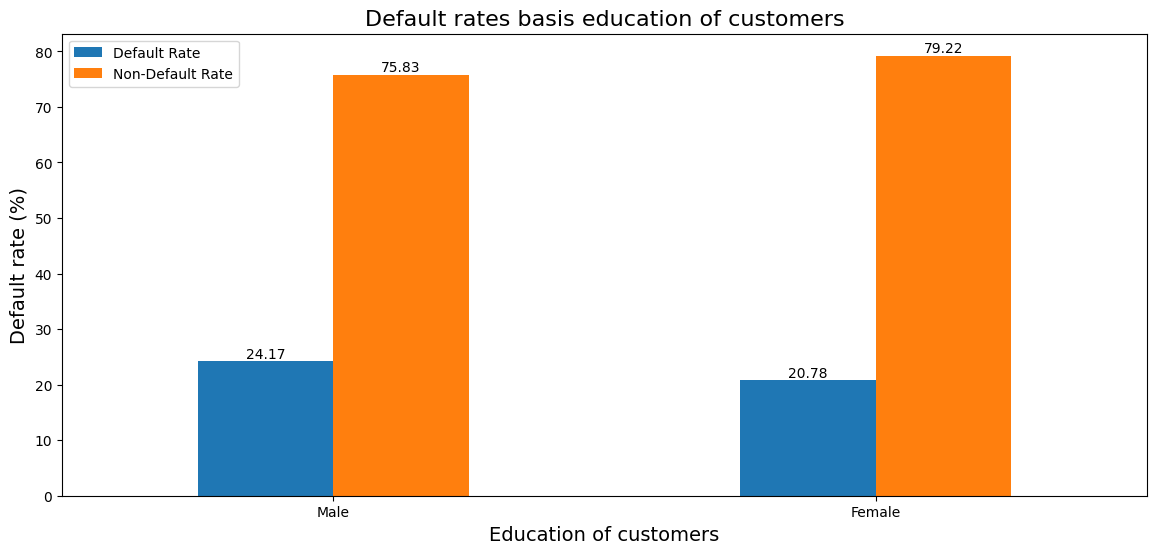

In [42]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt_ = gender[['default_ratio', 'not_default_ratio']].plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt_.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Set x-axis tick labels to match the 'gender' categories
ax.set_xticklabels(['Male','Female'])

plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize=16)
plt.xlabel("Education of customers", fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.legend(["Default Rate", "Non-Default Rate"])
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.



##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

As seen earlier, most customers are Females (~60%).
Basis gender of customers, chances of Males defaulting on their payments next month is higher than that of Females.
~24.17% males have defaulted next month, while only ~20.78% females defaulted next month.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

#### Chart - 9 - Marital Status and Default Rate


In [43]:
# Creating crosstable to analyse relationship between marital status and default chances
marital = pd.crosstab(df.marital_status, df.default_nxt_mnth)
# Adding columns for default and not_default rates
marital['default_ratio'] = round(((marital[1]/(marital[0]+marital[1]))*100),2)
marital['Non_default_ratio'] = round(((marital[0]/(marital[0]+marital[1]))*100),2)
marital

default_nxt_mnth      0     1  default_ratio  Non_default_ratio
marital_status                                                 
1                 10453  3206          23.47              76.53
2                 12623  3341          20.93              79.07
3                   288    89          23.61              76.39

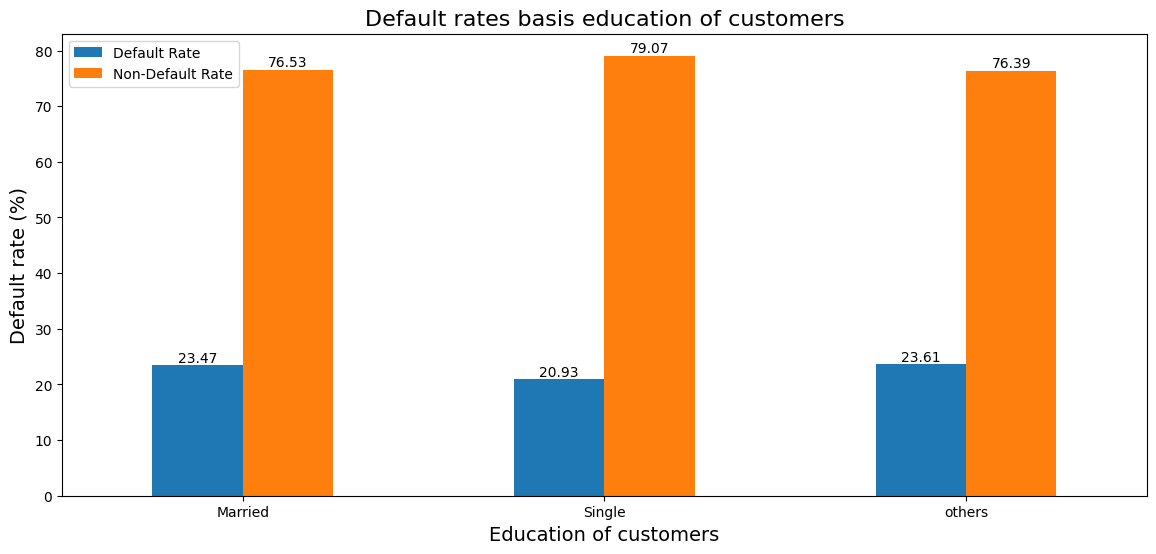

In [44]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt_ = marital[['default_ratio', 'Non_default_ratio']].plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt_.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Set x-axis tick labels to match the 'gender' categories
ax.set_xticklabels(['Married','Single','others'])

plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize=16)
plt.xlabel("Education of customers", fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.legend(["Default Rate", "Non-Default Rate"])
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

As seen earlier, the majority of customers are single.
Since data for the Others category is very low, I am going to ignore its default rate being the highest.
Taking the Others category out of consideration, the Chances of defaulting are highest for customers who are married (~23.5%).

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

it will impact positively because as they default banks will earn and more chances married people will pay the amount as soon as possible because they need credit cards more compared to singles.

#### Chart - 10 - Age and Default Rate

In [45]:
# Creating a copy of dataframe for experimenting with Age variable & its trends
age_binned = df.copy()
# Binning ages into 6 groups
age_binned['age_bins'] = pd.cut(x=age_binned['age'],bins=[20,30,40,50,60,70,80])
age_binned.head()

0  cust_id  max_credit_limit  gender  education  marital_status  age  \
0        1             20000       2          2               1   24   
1        2            120000       2          2               2   26   
2        3             90000       2          2               2   34   
3        4             50000       2          2               1   37   
4        5             50000       1          2               1   57   

0  pay_status_sept  pay_status_aug  pay_status_july  pay_status_june  \
0                2               2               -1               -1   
1               -1               2                0                0   
2                0               0                0                0   
3                0               0                0                0   
4               -1               0               -1                0   

0  pay_status_may  pay_status_april  bill_sept  bill_aug  bill_july  \
0              -2                -2       3913      3102        689   
1               0                 2       2682      1725       2682   
2               0                 0      29239     14027      13559   
3               0                 0      46990     48233      49291   
4               0                 0       8617      5670      35835   

0  bill_june  bill_may  bill_april  amt_paid_sept  amt_paid_aug  amt_paid_jul  \
0          0         0           0              0           689             0   
1       3272      3455        3261              0          1000          1000   
2      14331     14948       15549           1518          1500          1000   
3      28314     28959       29547           2000          2019          1200   
4      20940     19146       19131           2000         36681         10000   

0  amt_paid_jun  amt_paid_may  amt_paid_april  default_nxt_mnth  age_bins  
0             0             0               0                 1  (20, 30]  
1          1000             0            2000                 1  (20, 30]  
2          1000          1000            5000                 0  (30, 40]  
3          1100          1069            1000                 0  (30, 40]  
4          9000           689             679                 0  (50, 60]

In [46]:
# Creating crosstable to analyse relationship between age_groups and default chances
age_def = pd.crosstab(age_binned.age_bins, age_binned.default_nxt_mnth)
# adding columns fo rdefault rate and not_Default rates
age_def['default_ratio'] = round(((age_def[1]/(age_def[0]+age_def[1]))*100),2)
age_def['Non_default_ratio'] = round(((age_def[0]/(age_def[0]+age_def[1]))*100),2)
age_def

default_nxt_mnth     0     1  default_ratio  Non_default_ratio
age_bins                                                      
(20, 30]          8542  2471          22.44              77.56
(30, 40]          8524  2189          20.43              79.57
(40, 50]          4606  1399          23.30              76.70
(50, 60]          1493   504          25.24              74.76
(60, 70]           189    68          26.46              73.54
(70, 80]            10     5          33.33              66.67

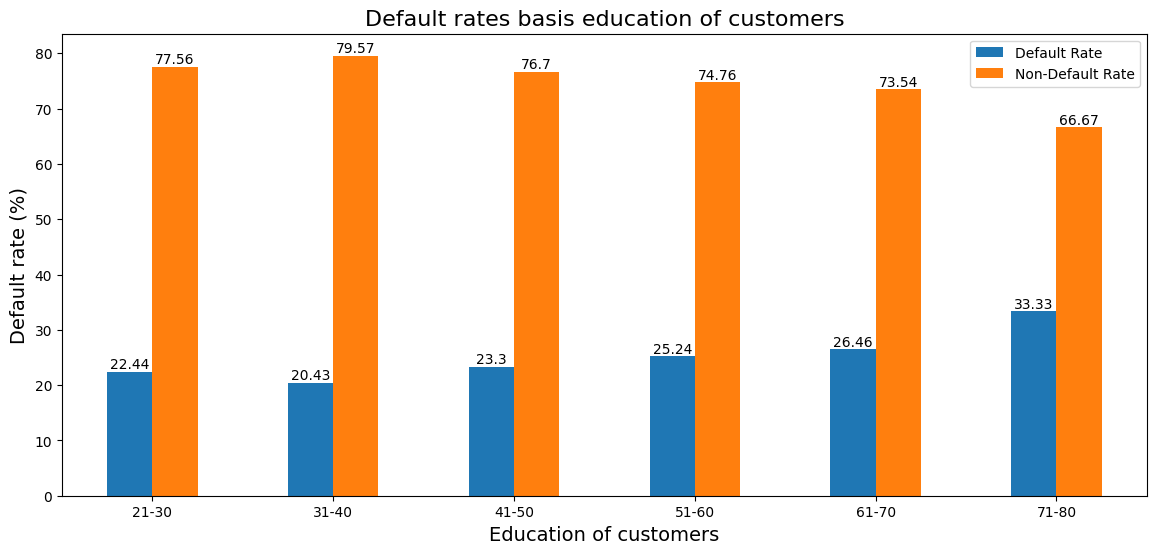

In [47]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt_ = age_def[['default_ratio', 'Non_default_ratio']].plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt_.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Set x-axis tick labels to match the 'gender' categories
ax.set_xticklabels(['21-30','31-40','41-50','51-60','61-70','71-80'])

plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize=16)
plt.xlabel("Education of customers", fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.legend(["Default Rate", "Non-Default Rate"])
plt.show()

##### 1. Why did you pick the specific chart?


**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

As we saw earlier Majority of customers are in the age group 21 to 40 years (~72%).
Customers within age groups 31 to 40 years are least likely to default, followed by 21 to 30 years group
Customers of 71 to 80 years old are most likely to default, followed by those 61 to 70 years old. Older people with high default chances make sense.
Since observations for older age groups (>60 years) are very few, we may ignore their respective trends of high default rates.
The Default rate gradually increases as the 'customers' age increases from 41 years and onwards.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

It will impact positively if give more offers to those customers aged between 21 to 40 because they are most expenders and less defaulters.

#### Chart - 11 - Bar Plot between Age, Gender and Defaults

In [48]:
# Creating crosstable to analyse relationship between age_groups, gender and default chances
age_gen_def = pd.crosstab(age_binned.age_bins, [age_binned.gender, age_binned.default_nxt_mnth],rownames=['age_bins'], colnames=['gender', 'default_nxt_mnth'])
age_gen_def['male_default'] = round(((age_gen_def[1][1]/(age_gen_def[1][0]+age_gen_def[1][1]))*100),2)
age_gen_def['female_default'] = round(((age_gen_def[2][1]/(age_gen_def[2][0]+age_gen_def[2][1]))*100),2)
age_gen_def

gender               1           2       male_default female_default
default_nxt_mnth     0     1     0     1                            
age_bins                                                            
(20, 30]          2929   913  5613  1558        23.76          21.73
(30, 40]          3350  1013  5174  1176        23.22          18.52
(40, 50]          1939   648  2667   751        25.05          21.97
(50, 60]           686   261   807   243        27.56          23.14
(60, 70]           105    35    84    33        25.00          28.21
(70, 80]             6     3     4     2        33.33          33.33

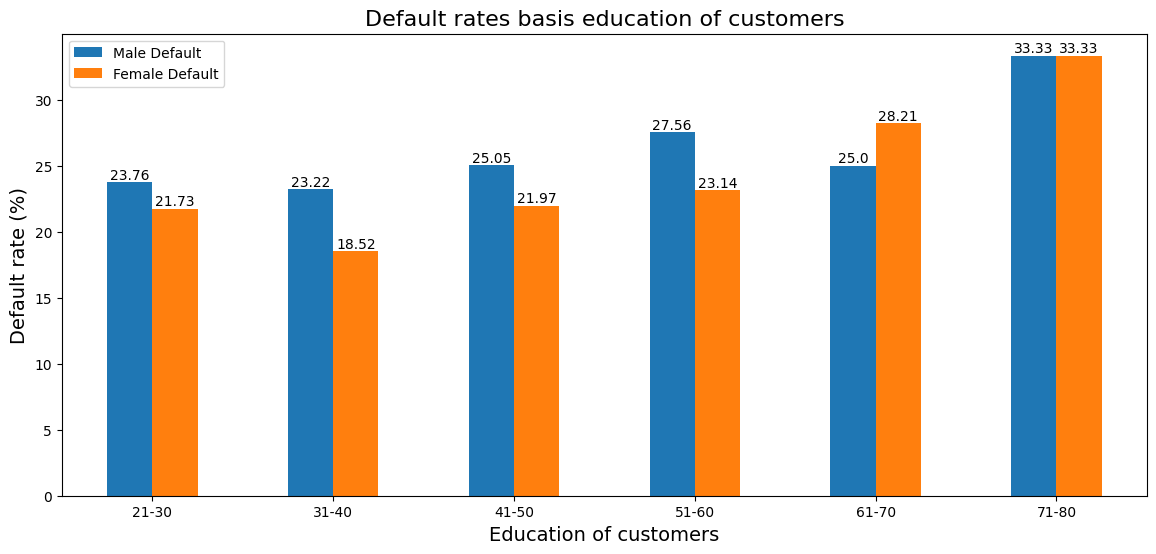

In [49]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt_ = age_gen_def[['male_default', 'female_default']].plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt_.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Set x-axis tick labels to match the 'gender' categories
ax.set_xticklabels(['21-30','31-40','41-50','51-60','61-70','71-80'])

plt.xticks(rotation=0)
plt.title("Default rates basis education of customers", fontsize=16)
plt.xlabel("Education of customers", fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.legend(["Male Default", "Female Default"])
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

Both Male and Females of age group 31 to 40 years are least likely to default in their respective gender population.
Among all customers, who are Female and of age group 31 to 40 years are least likely to default next month.

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**

We can give more offers and discounts to those customers who are less likely to default that's how the bank will increase their business.

#### Chart - 12 - Marriage, Gender and Default status

In [55]:
# Calculating defaults rates in 6 categories basis Gender-Marital Status
gen_marital_def = df.groupby(['gender','marital_status','default_nxt_mnth']).size().reset_index(name='count2')
total_def1 = gen_marital_def[gen_marital_def['default_nxt_mnth']==1].groupby(['gender','marital_status'])['count2'].sum().to_frame()
total_pop1 = gen_marital_def.groupby(['gender','marital_status'])['count2'].sum().to_frame()
gen_marital_def1 = round((total_def1*100/total_pop1), 2)
gen_marital_def1.unstack()

count2              
marital_status      1      2      3
gender                             
1               25.93  22.66  28.97
2               21.96  19.72  20.26

Text(0, 0.5, 'Default Rate (%)')

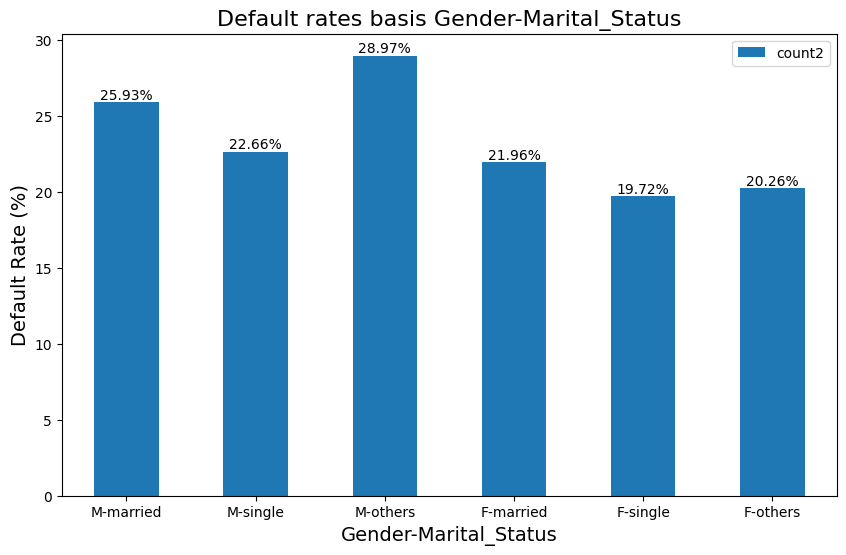

In [56]:
# Plotting Default rates basis Gender-Marital_Status
g3 = gen_marital_def1.plot(kind='bar', figsize = (10,6))
g3.set_xticklabels(['M-married','M-single','M-others','F-married','F-single','F-others'])
plt.xticks(rotation = 0)
annot(g3)
plt.title('Default rates basis Gender-Marital_Status', fontsize = 16)
plt.xlabel('Gender-Marital_Status', fontsize = 14)
plt.ylabel('Default Rate (%)', fontsize = 14)

In [57]:
# Getting shares of 6 categories among total defaulters
gen_marital_def['def_percent'] = np.where(gen_marital_def['default_nxt_mnth']==1, round(((gen_marital_def['count2']/
                                                                             (gen_marital_def[gen_marital_def['default_nxt_mnth']==1]
                                                                              ['count2'].sum()))*100),2), 0)
gen_marital_def[gen_marital_def['default_nxt_mnth']==1].sort_values(by='def_percent',ascending=False)

gender  marital_status  default_nxt_mnth  count2  def_percent
7        2               1                 1    1860        28.03
9        2               2                 1    1856        27.97
3        1               2                 1    1485        22.38
1        1               1                 1    1346        20.28
11       2               3                 1      47         0.71
5        1               3                 1      42         0.63

Text(0, 0.5, '% Share of total Defaulters')

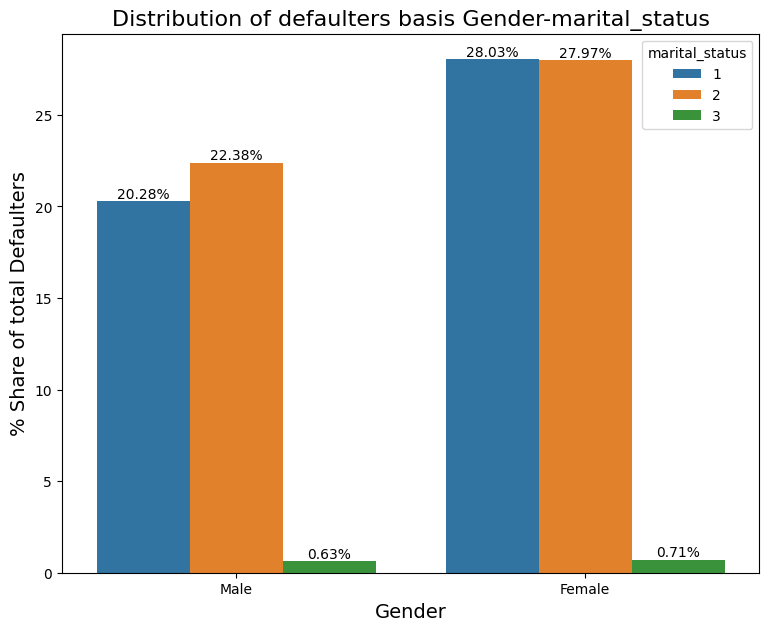

In [58]:
# Distribution of defaulters basis Gender-education
fig, ax = plt.subplots(figsize = (9,7))
g4 = sns.barplot(x='gender',y='def_percent', hue='marital_status', data=gen_marital_def[gen_marital_def['default_nxt_mnth']==1], ci=None)
g4.set_xticklabels(['Male','Female'])
annot(g4)
plt.title('Distribution of defaulters basis Gender-marital_status', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('% Share of total Defaulters', fontsize = 14)

##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

Not considering other categories due to very few observations, it found that the chances of a Married Male defaulting are the highest (~25.9%).

Single Females are least likely to default next month (~19.7%).

Among defaulters, Married females have the highest share (~28%), shortly followed by Single Females. It's logical, as we have seen earlier that most majority of customers are Females (around 60%).

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.





**Answer:-**

#### Chart - 13 - Education, Gender and Default rate

In [50]:
# Calculating default rates in 8 categories basis Gender-education
gen_edu_def = df.groupby(['gender','education','default_nxt_mnth']).size().reset_index(name='count1')
total_def = gen_edu_def[gen_edu_def['default_nxt_mnth']==1].groupby(['gender','education'])['count1'].sum().to_frame()
total_pop = gen_edu_def.groupby(['gender','education'])['count1'].sum().to_frame()
gen_edu_def1 = round((total_def*100/total_pop), 2)
gen_edu_def1.unstack()

count1                   
education      1     2      3     4
gender                             
1          20.81  26.2  27.39  8.24
2          18.14  22.2  23.64  6.38

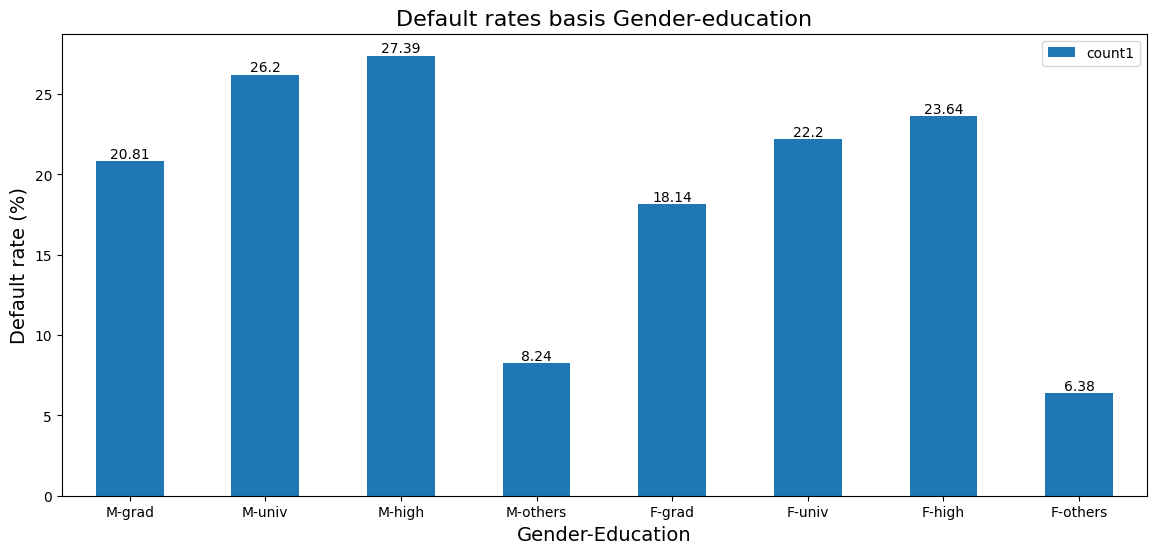

In [51]:
# Plotting bar chart to visualize education levels and their respective default rates.
plt_ = gen_edu_def1.plot(kind='bar', figsize=(14, 6))
ax = plt.gca()

# Annotating bars with default rates
for p in plt_.patches:
    plt.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Set x-axis tick labels to match the 'gender' categories
ax.set_xticklabels(['M-grad','M-univ','M-high','M-others','F-grad','F-univ','F-high','F-others'])

plt.xticks(rotation=0)
plt.title('Default rates basis Gender-education', fontsize=16)
plt.xlabel('Gender-Education', fontsize=14)
plt.ylabel("Default rate (%)", fontsize=14)
plt.show()


In [52]:
# Getting shares of 8 categories among total defaulters
gen_edu_def['def_percent'] = np.where(gen_edu_def['default_nxt_mnth']==1, round(((gen_edu_def['count1']/
                                                                             (gen_edu_def[gen_edu_def['default_nxt_mnth']==1]['count1'].sum()))*100),2), 0)
gen_edu_def[gen_edu_def['default_nxt_mnth']==1].sort_values(by='def_percent',ascending=False)

gender  education  default_nxt_mnth  count1  def_percent
11       2          2                 1    1922        28.96
3        1          2                 1    1408        21.22
9        2          1                 1    1130        17.03
1        1          1                 1     906        13.65
13       2          3                 1     692        10.43
5        1          3                 1     545         8.21
15       2          4                 1      19         0.29
7        1          4                 1      14         0.21

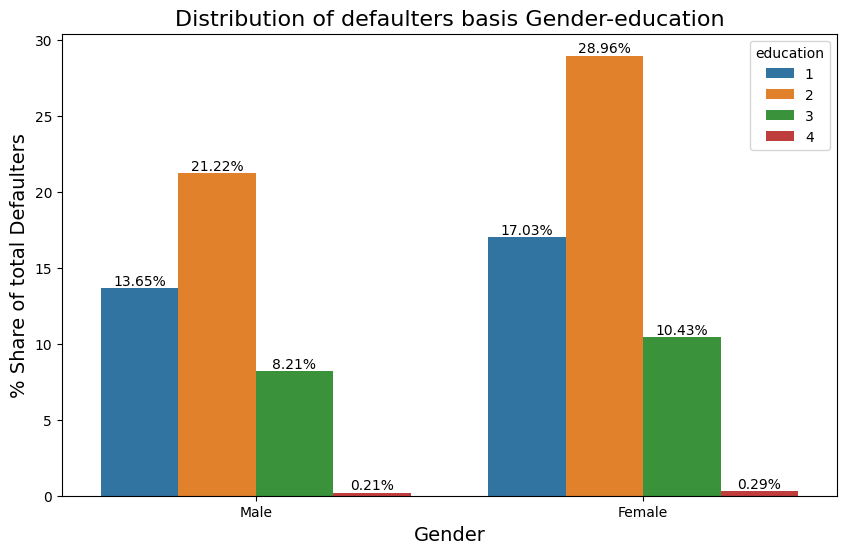

In [53]:
# Define the annot function
def annot(plot):
    for p in plot.patches:
        plot.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
g1 = sns.barplot(x='gender', y='def_percent', hue='education', data=gen_edu_def[gen_edu_def['default_nxt_mnth'] == 1], ci=None)
g1.set_xticklabels(['Male', 'Female'])

# Annotate the bars
annot(g1)

plt.title('Distribution of defaulters basis Gender-education', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('% Share of total Defaulters', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A bar chart is used to visually represent categorical data by displaying bars of different heights or lengths to represent the frequency, count, or value associated with each category, making it easy to compare and visualize data distributions and trends.



##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

A Male customer with High-school level education, has the highest chance of defaulting (~27.39%), shortly followed by Male with University level (26.2%)

Not considering others category due to very few observations, found that Females with graduate education are least likely to default next month (~18.14%).

Among defaulters, Females with university level education has the highest share (~28.96%), followed by males of university level education (21.22%).

##### 3. Will the gained insights help creating a positive business impact?
##### Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:-**


#### Chart - 14 - Correlation Heatmap

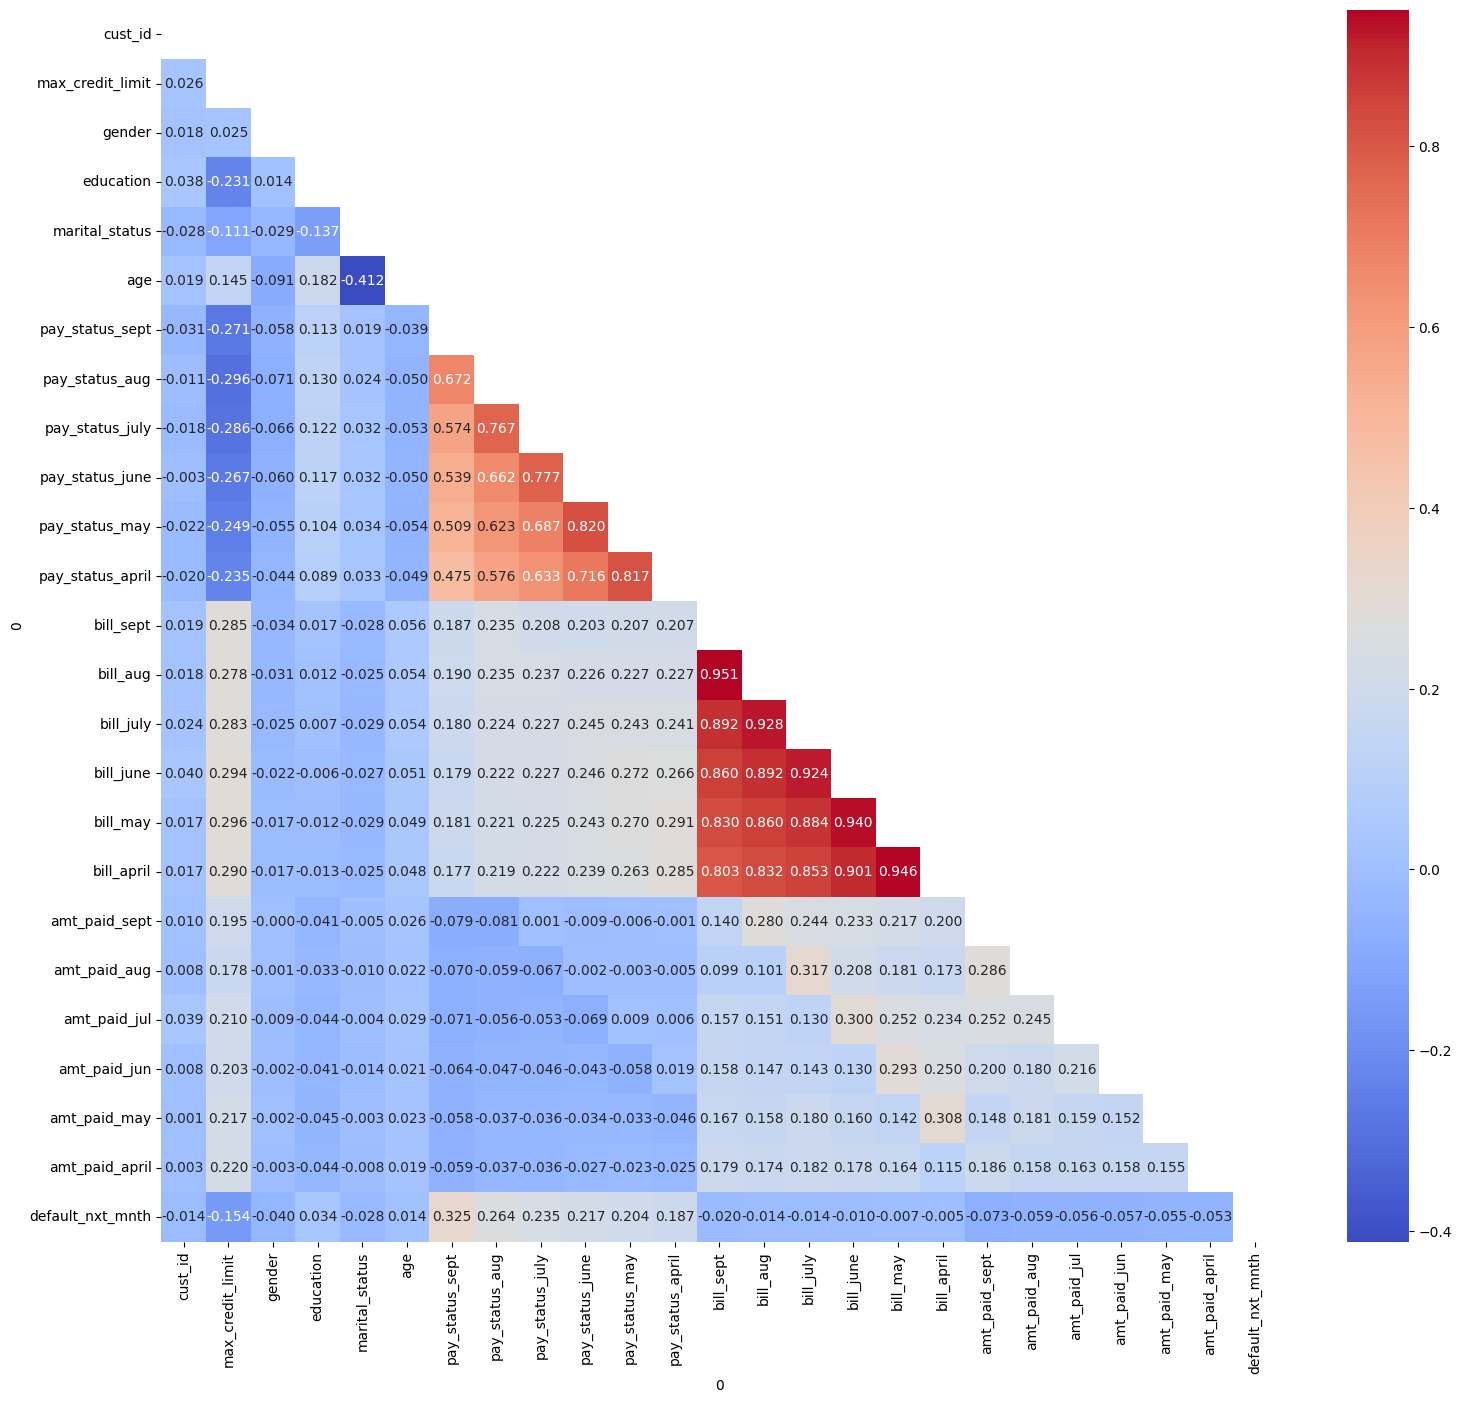

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(18, 16))
corr = df.corr()

# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

# Create a heatmap with annotations formatted to three decimal places
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix, fmt='.3f')

plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A heatmap is used to visually represent data values in a matrix-like format, using colors to convey information about the intensity or magnitude of each value. It helps reveal patterns, correlations, or variations within the data, making complex datasets more accessible and understandable.

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

1. bill_X for all 6 months are strongly correlated (>0.8)
2. pay_status_X of all 6 months are moderately correlated (>0.47).
3. Target variable is moderately correlated with "pay_status_sept"

#### Chart - 15 - Pair Plot

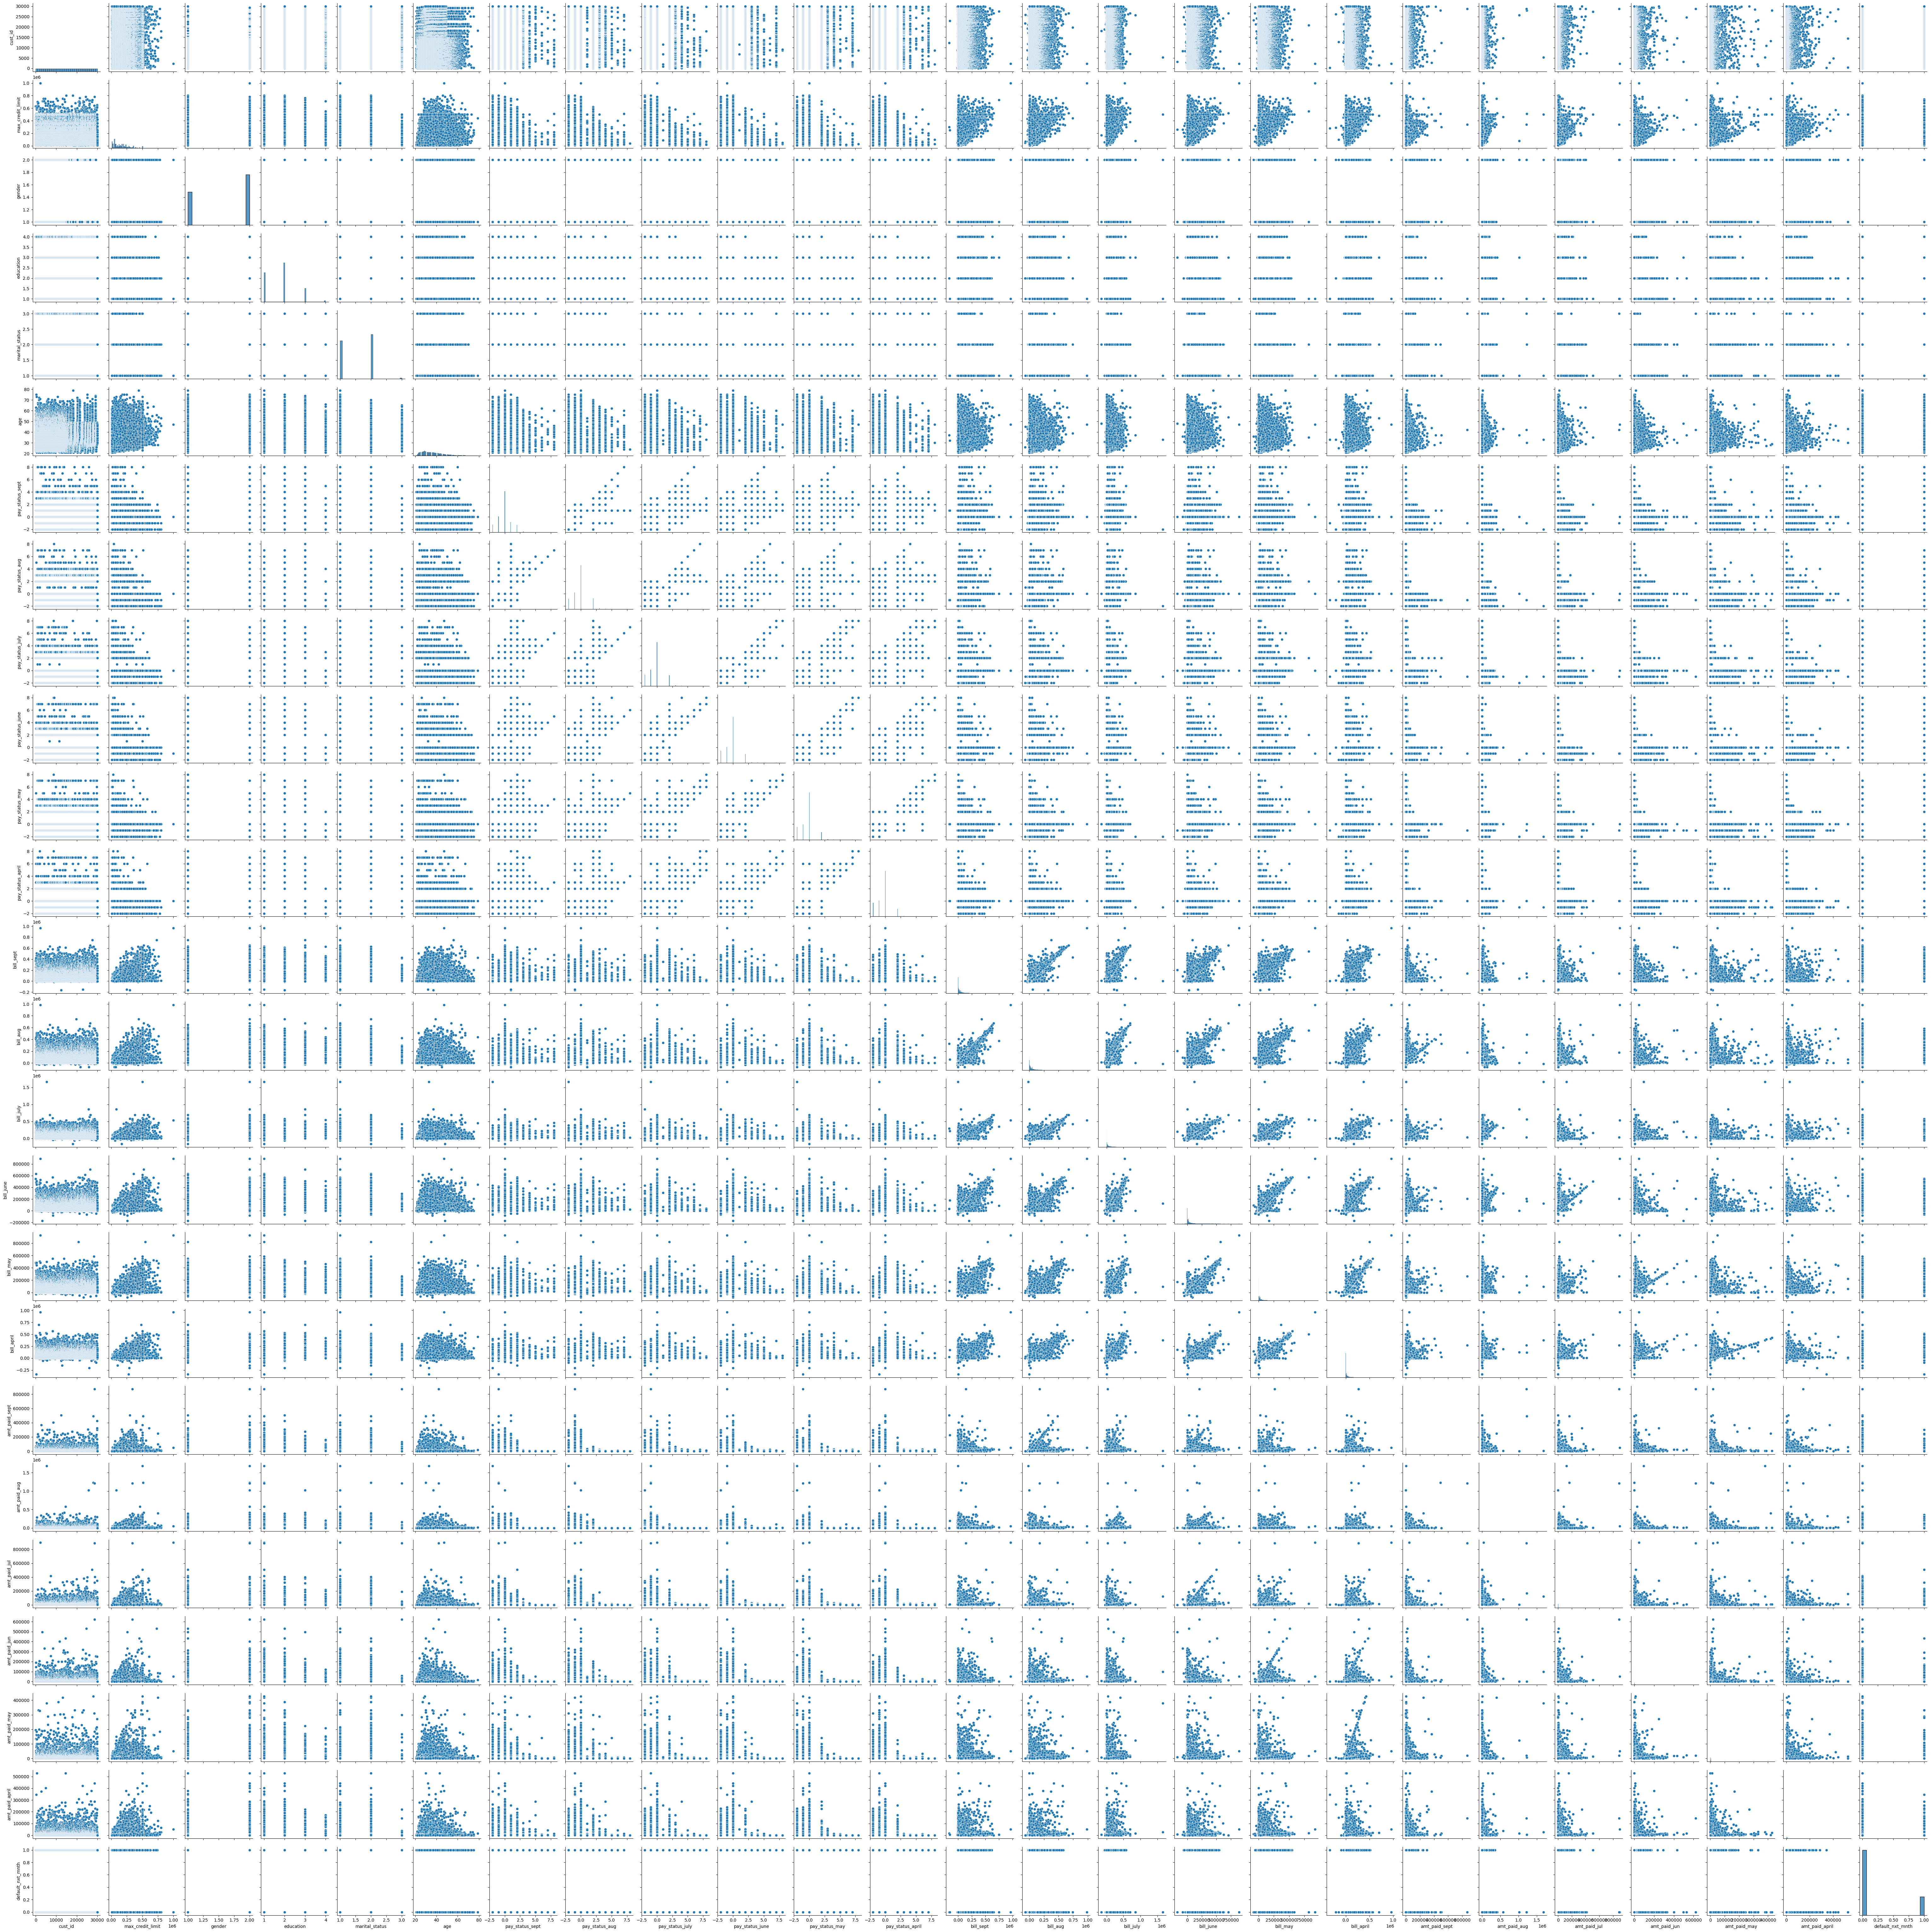

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:-**

A pair plot is used to visualize pairwise relationships between numerical variables in a dataset, helping to identify patterns, correlations, and outliers quickly, which is essential for exploratory data analysis (EDA).

##### 2. What is/are the insight(s) found from the chart?

**Answer:-**

There is a linear relationship between bil_x variables and all variables are scattered in each variable outliers are also there, and variables are not normally distributed

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Answer:-**
1. Null Hypothesis (H0):- There is no correlation between bill_may and bill_april

 Alternative Hypothesis (H1):- There is correlation between bill_may and bill_april

2. Null Hypothesis (H0):- There is no correlation between age and marital_status

   Alternative Hypothesis (H1):- There is correlation between age and marital_status

3. Null Hypothesis (H0):- There is no correlation between Education and max_credit_limit

  Alternative Hypothesis (H1):- There is correlation between Education and max_credit_limit

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:-**

**Null Hypothesis (H0):-** There is no correlation between bill_may and bill_april

**Alternative Hypothesis (H1):-** There is correlation between bill_may and bill_april

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Define two sample datasets
sample1 = df["bill_april"].head(60)
sample2 = df["bill_may"].head(60)

# Performing a two-sample t-test
t_statistic, p_value = pearsonr(sample1, sample2)
print('t_statistic=%.3f, p_value = %.2f'%(t_statistic, p_value))

# Check if p-value is less than alpha (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t_statistic=0.945, p_value = 0.00
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

**Answer:-**

I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

**Answer:-**

I want to check the relationship between two features to see if they are positively or negatively correlated. the P-value and Pearson Correlation coefficient will always be between -1 and 1. Here we can see that after applying the test on bill_april and bill_april features we got a Correlation coefficient of 0.945 which implies that these two features have a strong positive correlation between them.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:-**

**Null Hypothesis (H0):-** There is no correlation between age and marital_status

**Alternative Hypothesis (H1):-** There is correlation between age and marital_status

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Define two sample datasets
sample1 = df["age"].head(60)
sample2 = df["marital_status"].head(60)

# Performing a two-sample t-test
t_statistic, p_value = pearsonr(sample1, sample2)
print('t_statistic=%.3f, p_value = %.2f'%(t_statistic, p_value))

# Check if p-value is less than alpha (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t_statistic=-0.501, p_value = 0.00
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

**Answer:-**

I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

**Answer:-**

I want to check the relationship between two features to see if they are positively or negatively correlated. the P-value and Pearson Correlation coefficient will always be between -1 and 1. Here we can see that after applying the test on age and marital_status features we got a Correlation coefficient of -0.501 which implies that these two features have a negative correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:-**

**Null Hypothesis (H0):-** There is no correlation between education and max_credit_limit

**Alternative Hypothesis (H1):-** There is correlation between education and max_credit_limit

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Define two sample datasets
sample1 = df["education"].head(60)
sample2 = df["max_credit_limit"].head(60)

# Performing a two-sample t-test
t_statistic, p_value = pearsonr(sample1, sample2)
print('t_statistic=%.3f, p_value = %.2f'%(t_statistic, p_value))

# Check if p-value is less than alpha (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

t_statistic=-0.231, p_value = 0.08
Fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

**Answer:-**

I have used the Pearson Correlation test to obtain the P-Value. It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on education and max_credit_limit features we got Correlation coefficient as -0.231 which implies that theses two features are having weak negative correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [64]:
# Handling Missing Values & Missing Value Imputation

df.isna().sum()

0
cust_id             0
max_credit_limit    0
gender              0
education           0
marital_status      0
age                 0
pay_status_sept     0
pay_status_aug      0
pay_status_july     0
pay_status_june     0
pay_status_may      0
pay_status_april    0
bill_sept           0
bill_aug            0
bill_july           0
bill_june           0
bill_may            0
bill_april          0
amt_paid_sept       0
amt_paid_aug        0
amt_paid_jul        0
amt_paid_jun        0
amt_paid_may        0
amt_paid_april      0
default_nxt_mnth    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer:-**

We don't have any null or duplicate values in this dataset. So, we don't need to treat them.

### 2. Handling Outliers

In [70]:
# Checking info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cust_id           30000 non-null  int64
 1   max_credit_limit  30000 non-null  int64
 2   gender            30000 non-null  int64
 3   education         30000 non-null  int64
 4   marital_status    30000 non-null  int64
 5   age               30000 non-null  int64
 6   pay_status_sept   30000 non-null  int64
 7   pay_status_aug    30000 non-null  int64
 8   pay_status_july   30000 non-null  int64
 9   pay_status_june   30000 non-null  int64
 10  pay_status_may    30000 non-null  int64
 11  pay_status_april  30000 non-null  int64
 12  bill_sept         30000 non-null  int64
 13  bill_aug          30000 non-null  int64
 14  bill_july         30000 non-null  int64
 15  bill_june         30000 non-null  int64
 16  bill_may          30000 non-null  int64
 17  bill_april        30000 non-nul

In [71]:
# Checking unique counts of each variables
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  cust_id is 30000 .
No. of unique values in  max_credit_limit is 81 .
No. of unique values in  gender is 2 .
No. of unique values in  education is 4 .
No. of unique values in  marital_status is 3 .
No. of unique values in  age is 56 .
No. of unique values in  pay_status_sept is 11 .
No. of unique values in  pay_status_aug is 11 .
No. of unique values in  pay_status_july is 11 .
No. of unique values in  pay_status_june is 11 .
No. of unique values in  pay_status_may is 10 .
No. of unique values in  pay_status_april is 10 .
No. of unique values in  bill_sept is 22723 .
No. of unique values in  bill_aug is 22346 .
No. of unique values in  bill_july is 22026 .
No. of unique values in  bill_june is 21548 .
No. of unique values in  bill_may is 21010 .
No. of unique values in  bill_april is 20604 .
No. of unique values in  amt_paid_sept is 7943 .
No. of unique values in  amt_paid_aug is 7899 .
No. of unique values in  amt_paid_jul is 7518 .
No. of unique values in  amt

In [72]:
# Creating continuous features list
Continuous_features = ['max_credit_limit','bill_sept','bill_aug',
                       'bill_july','bill_june','bill_may','bill_april',
                       'amt_paid_sept','amt_paid_aug','amt_paid_jul',
                       'amt_paid_jun','amt_paid_may','amt_paid_april']

[Text(0.5, 1.0, 'Boxplots for Continuous variables'),
 Text(0.5, 0, 'Continuous Features')]

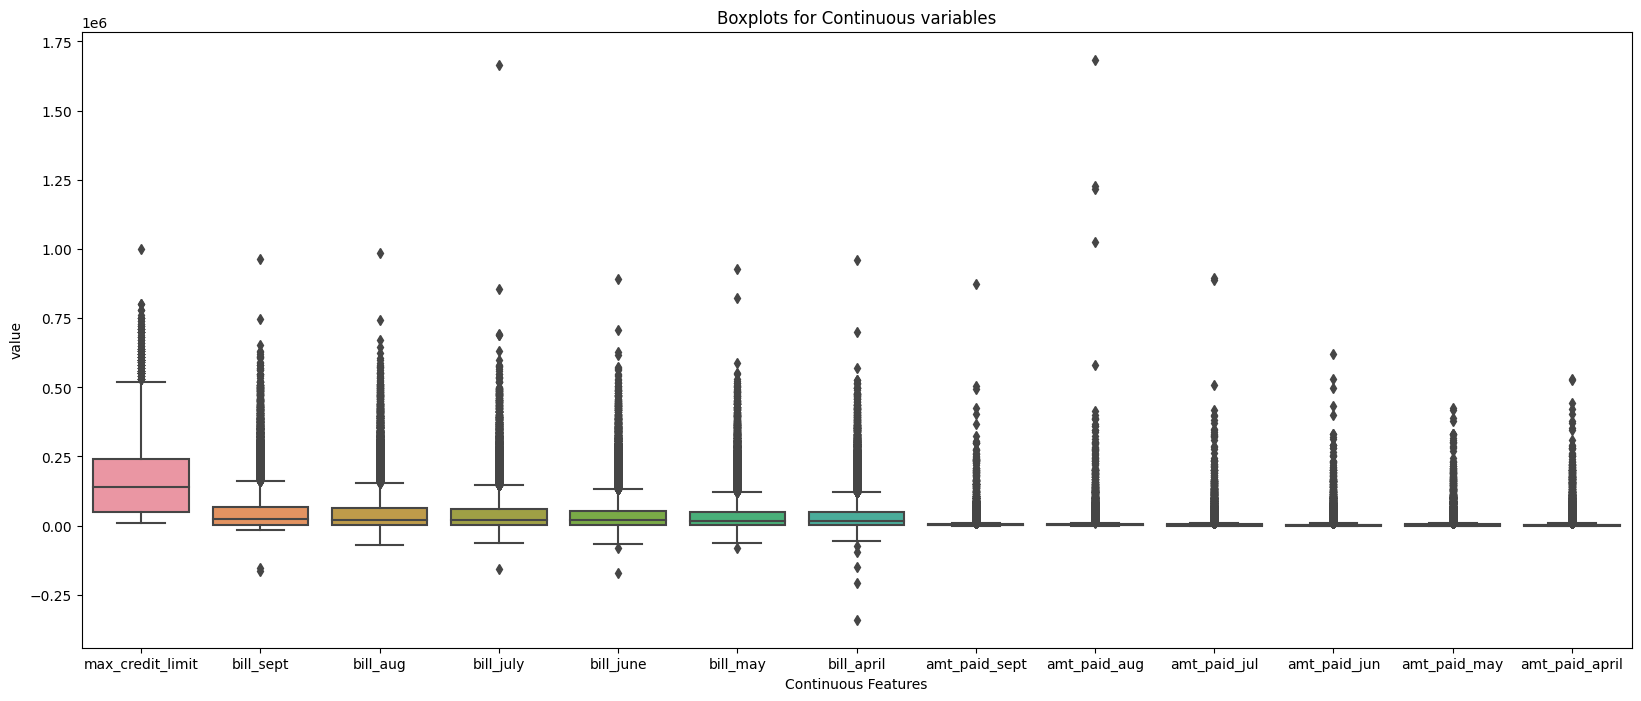

In [74]:
# Handling Outliers & Outlier treatments
# checking outliers with the help of box plot for continous features

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(df[Continuous_features])).set(title='Boxplots for Continuous variables',
                                                                     xlabel="Continuous Features")

From the above box plots, we can see that all features contain several outliers. and Bills have negative values, which could mean the customer has paid more than their last month's billed amount.

[Text(0.5, 1.0, 'Boxplots for Numerical variables'),
 Text(0.5, 0, 'Numerical Features')]

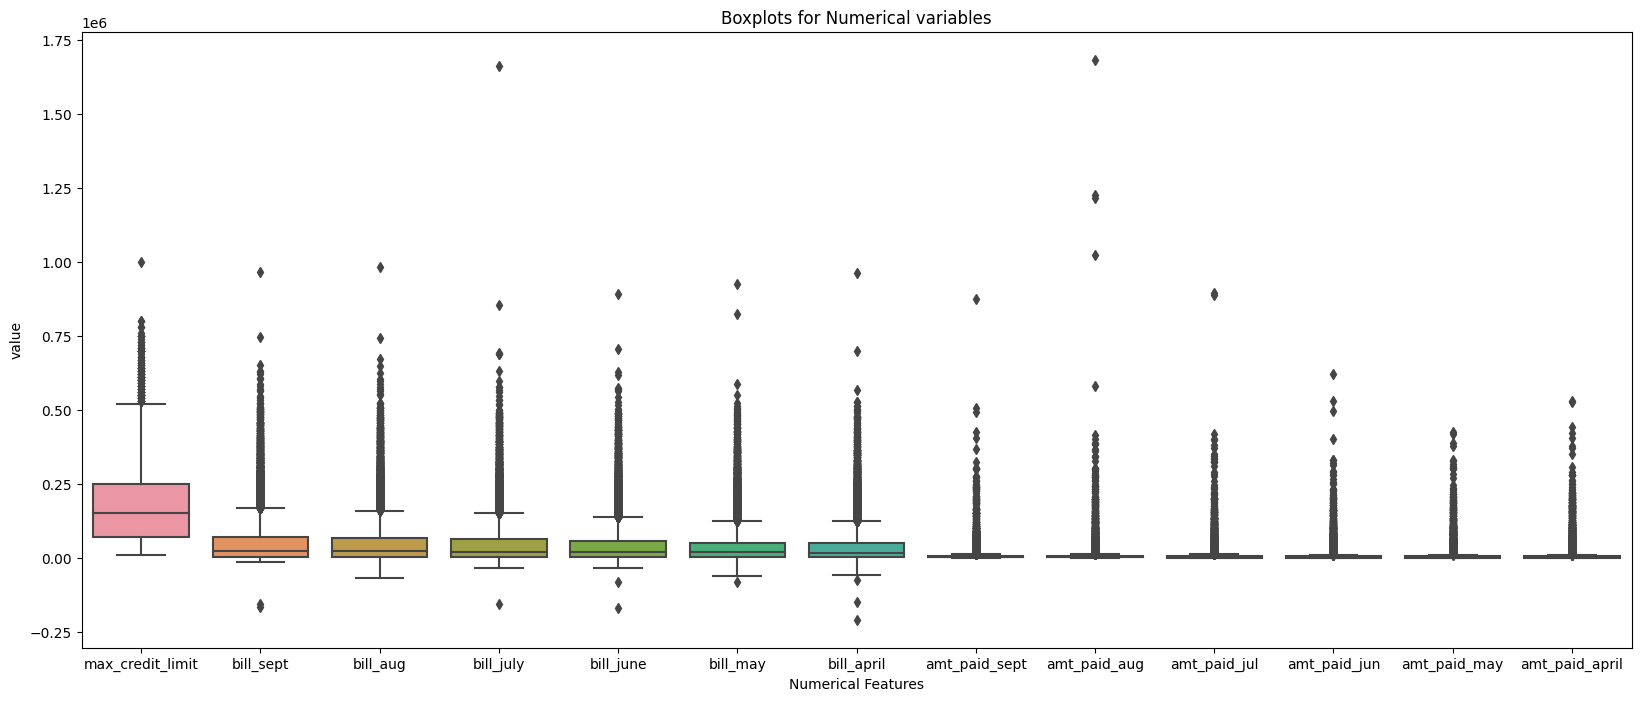

In [75]:
# Boxplots for all continuous features except age and defaulters rows

fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(df[df['default_nxt_mnth']==0][Continuous_features])).set(title='Boxplots for Continuous variables',
                                                                                                    xlabel="Continuous Features")


Bills have negative values for non-defaulters, it could mean the customer has paid more than their last month's billed amount.

[Text(0.5, 1.0, 'Boxplots for Continuous variables for defaulters'),
 Text(0.5, 0, 'Continuous Features')]

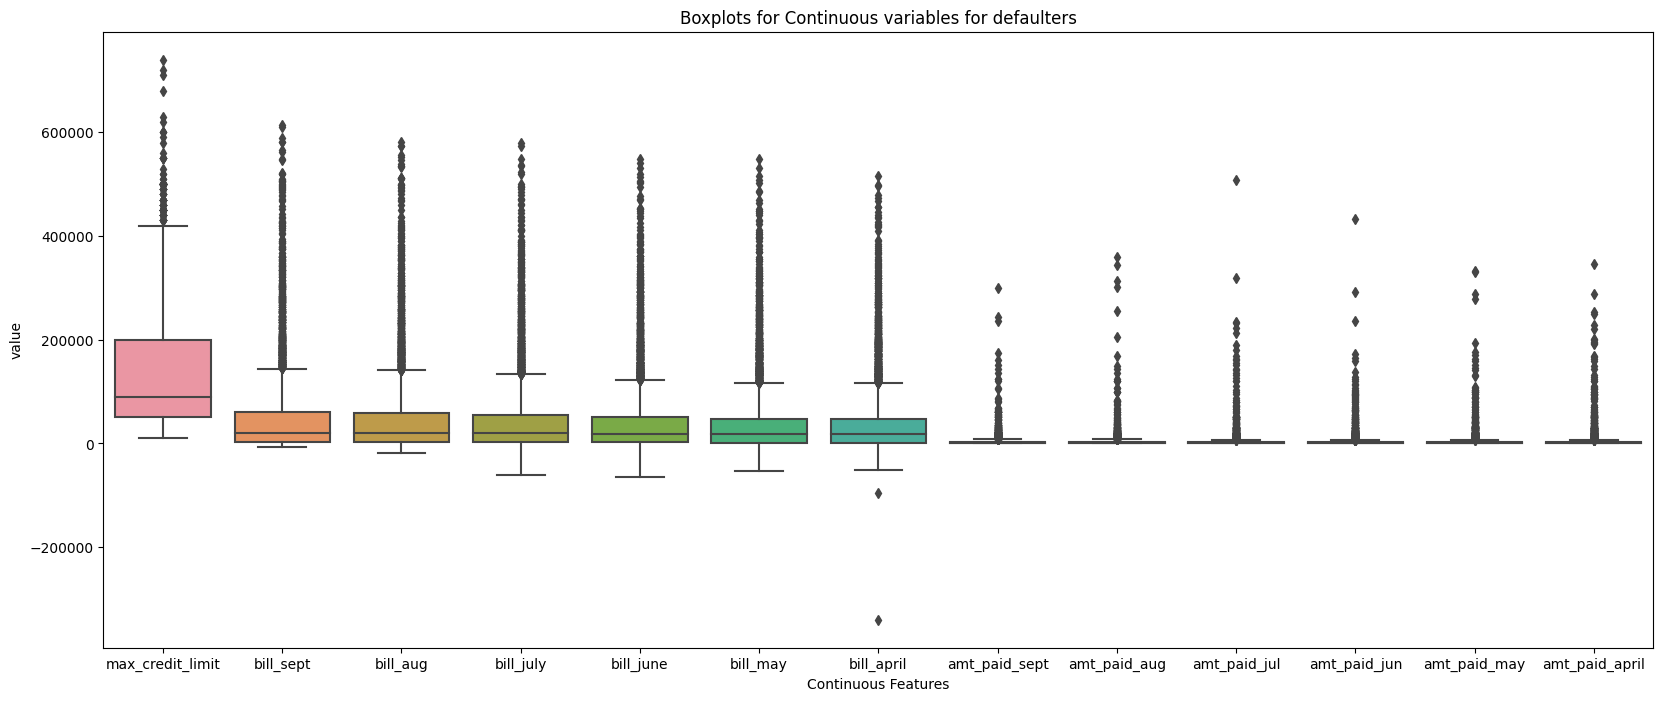

In [76]:
# Boxplots for all continuous features except age and Non-defaulters rows
Continuous_features = ['max_credit_limit','bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'amt_paid_sept', 'amt_paid_aug', 'amt_paid_jul', 'amt_paid_jun', 'amt_paid_may', 'amt_paid_april']
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=0, y="value", data=pd.melt(df[df['default_nxt_mnth']==1][Continuous_features])).set(title='Boxplots for Continuous variables for defaulters',
                                                                                                    xlabel="Continuous Features")

Here, Bills do not have negative values for defaulters, because they are defaulters they not paying their bill amount how do they pay the extra amount.

In [78]:
# Checking the description of the continuous features
df[Continuous_features].describe()

0      max_credit_limit      bill_sept       bill_aug     bill_july  \
count      30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      167484.322667   51223.330900   49179.075167  4.701315e+04   
std       129747.661567   73635.860576   71173.768783  6.934939e+04   
min        10000.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%        50000.000000    3558.750000    2984.750000  2.666250e+03   
50%       140000.000000   22381.500000   21200.000000  2.008850e+04   
75%       240000.000000   67091.000000   64006.250000  6.016475e+04   
max      1000000.000000  964511.000000  983931.000000  1.664089e+06   

0          bill_june       bill_may     bill_april  amt_paid_sept  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25%      2326.750000    1763.000000    1256.000000    1000.000000   
50%     19052.000000   18104.500000   17071.000000    2100.000000   
75%     54506.000000   50190.500000   49198.250000    5006.000000   
max    891586.000000  927171.000000  961664.000000  873552.000000   

0      amt_paid_aug  amt_paid_jul   amt_paid_jun   amt_paid_may  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

0      amt_paid_april  
count    30000.000000  
mean      5215.502567  
std      17777.465775  
min          0.000000  
25%        117.750000  
50%       1500.000000  
75%       4000.000000  
max     528666.000000

<Axes: >

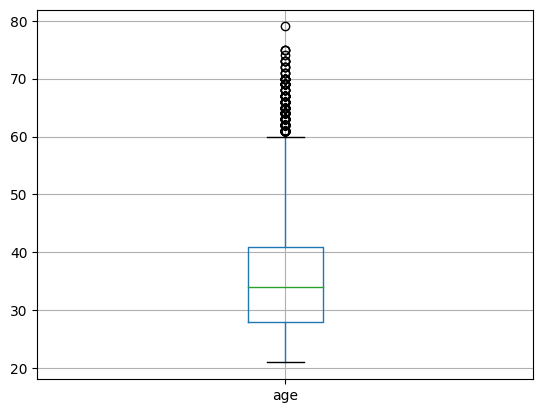

In [79]:
# boxplot for age separately as its values range on smaller scale compared to other features (Better visualization)
df[['age']].boxplot()


Here, Outliers are on the older age side but these are not outliers it is an actual data, If a person already has a credit card, it is less common for credit card companies to deactivate their cards. As long as the cardholder continues to meet their financial obligations, such as making payments on time and not exceeding credit limits, the card may remain active.

[Text(0.5, 1.0, 'Boxplots for categorical variables')]

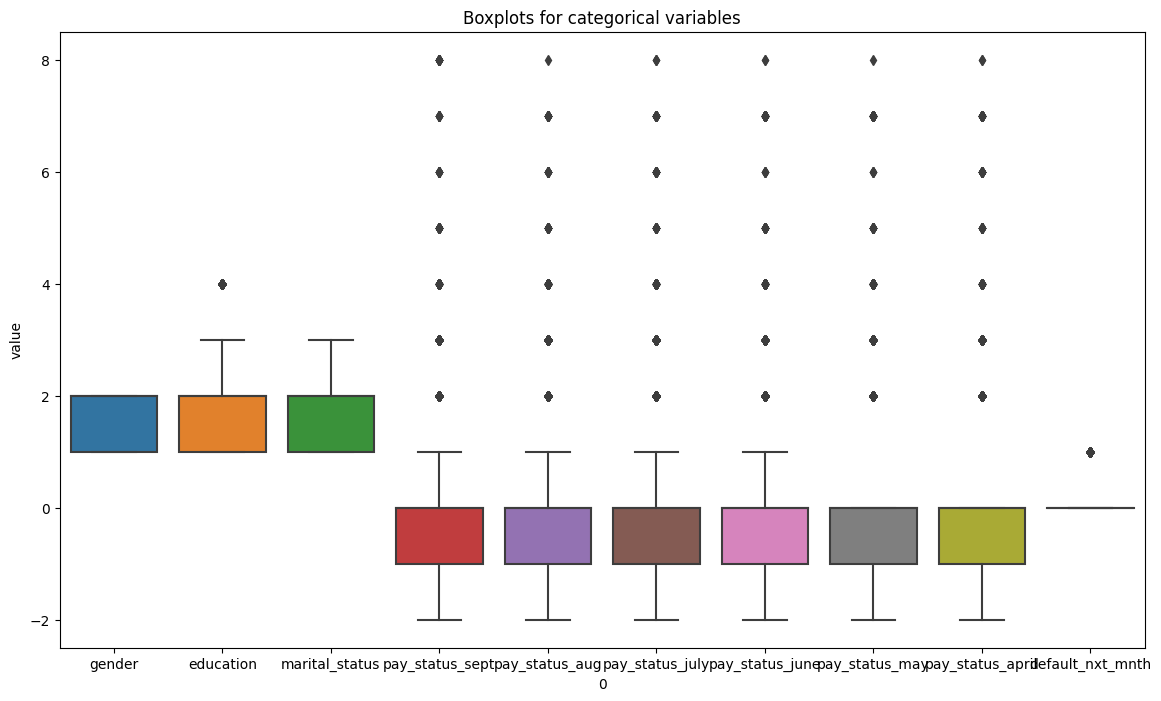

In [80]:
# Boxplots for all categorical features
categorical_features = ['gender','education', 'marital_status', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april','default_nxt_mnth']
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x=0, y="value", data=pd.melt(df[categorical_features])).set(title='Boxplots for categorical variables')


Here, above chart, there are some outliers we are seeing but these are not outliers these are actual data points. There are some undocumented categories such as -2 and 0. which I search on Kaggle and I find in the discussion section of the dataset on Kaggle.
-2. belongs to the amount paid in full and there is no new transaction.
0 belongs to the Customer who paid the minimum due amount, but not the entire amount.


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer:-**

1. Maximum credit limit and amt_paid_X have a lot of outliers on the positive sides; while bill_X has outliers on both sides.
2. Negative bill_X refers to those customers who have paid an amount more than their billed amount.
3. Age has few outliers on the positive side.
4. These outliers depict real-world data and can help us build realistic models. Therefore, I'm not treating them.
